In [1]:
# 0. INDICE PROYECTO.

#                                   1. INTRODUCCION.
#                                   2. DEFINICION DE VARIABLES DEL CONJUNTO DE DATOS.
#                                   3. OBJETO DEL ESTUDIO.
#                                   4. CARGA DE LIBRERIAS.
#                                   5. CARGA DE DATOS Y ANALISIS DESCRIPTIVO.
#                                   6. ANALISIS EXPLORATORIO Y VISUALIZACION.

#                                            6.1. Histogramas.
#                                            6.2. Graficos de densidad.
#                                            6.3. Diagramas de cajas y bigotes.

#                                   7. LIMPIEZA, PREPARACION Y TRANSFORMACION DE DATOS.
#                                   8. SELECCION DE LA IMPORTANCIA DE LA CARACTERISTICA.
#                                   9. MODELO NO SUPERVISADO K-MEANS (CONTINUACION ANALISIS EXPLORATORIO)
#                                  10. EVALUACION DE ALGORITMOS.COMPARACION ENTRE MODELOS SUPERVISADOS AFINES AL CASO.
#                                  11. CURVA ROC Y AUC.
#                               ANEXO. CARGA DEL MODELO Y RECUPERACION DEL MISMO.

In [2]:
# 1. INTRODUCCION.

# Los Pima son un pueblo aborigen de América del Norte que viven en Arizona. Una predisposición genética permitió que 
# este grupo sobreviviera normalmente a una dieta pobre en carbohidratos durante años.En los últimos años, debido a un 
# cambio repentino de los cultivos agrícolas tradicionales a los alimentos procesados, junto con una disminución en la 
# actividad física, los hizo desarrollar la mayor prevalencia de diabetes tipo 2 y por esta razón han sido objeto de 
# muchos estudios.
#
# En este estudio se evaluaron diferentes parámetros fisiológicos y bioquímicos a mujeres embarazadas hembras de al menos 
# 21 años, y se utilizaron como posibles predictores de aparición de diabetes en los cinco años que siguieron a los 
# análisis.
#
# Siguiendo el criterio de la OMS, se diagnosticó diabetes si la concentración de glucosa en plasma es mayor a 200 mg/dl
# a las dos horas de un test de tolerancia a la glucosa. En este dataset la mayor concentración de glucosa registrada fue
# 199 mg/dl.

In [3]:
# 2. DEFINICION DE VARIABLES DEL CONJUNTO DE DATOS.

# Este conjunto de datos contiene datos de 768 mujeres y 9 atributos de los cuales, 8 son variables independientes 
# (Variables de entrada) y uno es la variable de destino, es decir, la variable dependiente que determina si el paciente
# tiene diabetes o no que se representa como la variable de salida ("Outcome").
#
# las variables que se nos definen en nuestro conjunto de datos son:
#
#                  -Pregnancies:       Número de embarazos.
#                  -Glucose:           Concentración de glucosa en plasma a las dos horas de un test de tolerancia a la 
#                                      glucosa(mg/dl).
#                  -BloodP:            Presión sanguínea diastólica (mm Hg).
#                  -SkinThickness:     Espesor de la piel en el pliegue del triceps.
#                  -Insulin:           Niveles de insulina en suero (micro U / ml).
#                  -BMI:               Indice de Masa Corporal (peso en kg / altura en m^2).
#                  -DiabetesPedFunct:  Función de pedigree de diabetes.
#                  -Age:               Edad en años.
#                  -Outcome:           Variable de salida que determina "0" no diabetes, "1" Diabetes.
#

In [4]:
# 3. OBJETO DEL ESTUDIO.

# Dado un numero de miembros correspondiente a este conjunto de datos con ciertas caracteristicas, nosotros queremos
# construir un modelo Machine Learning que identifique a los afectados por la diabetes tipo 2.

In [5]:
# 4. CARGA DE LIBRERIAS.

In [6]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from  sklearn . datasets  import  make_classification
from  sklearn . metrics  import  roc_curve 
from  sklearn . metrics  import  roc_auc_score

In [7]:
# 5. CARGA DE DATOS Y ANALISIS DESCRIPTIVO.

In [8]:
# Procedemos a descargarnos el archivo "diabetes.csv" del proyecto a nuestro ordenador y desde alli lo cargamos
# y creamos nuestro dataframe en python.

In [9]:
file = 'd:/Users/USUARIO/Desktop/diabetes.csv'
diabeticset = pd.read_csv(file)
diabeticset.columns = ['Pregnancies', 'Glucose', 'BloodP', 'SkinThickness', 'Insulin', 'BMI', 'DibetesPedFunct', 'Age',
                       'Outcome']
diabeticset.head()

,Pregnancies,Glucose,BloodP,SkinThickness,Insulin,BMI,DibetesPedFunct,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Ahora vamos a comprobar la dimension que tiene nuestro conjunto de datos y vemos que tiene 768 lineas y 9 atributos.

In [11]:
diabeticset.shape

(768, 9)

In [12]:
# Ahora conociendo la dimension de nuestro conjunto de datos y sabiendo que nuestra variable de salida ("Outcome"),
# determina si los pacientes son diabeticos (valor 1), o no diabeticos (valor 0), vamos a conocer la proporcion de
# estos mediante agrupamiento y visualizandolo en grafica comparativa.

In [13]:
print(diabeticset.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


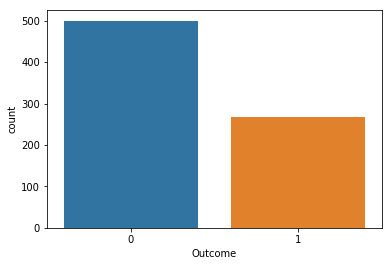

In [14]:
sns.countplot(diabeticset.Outcome, label = "Count")

In [15]:
# Posteriormente vamos a comprobar el tipo de datos de cada columna de nuestro dataframe asi como la cantidad de entradas
# y de registros no nulos por columnas.

In [16]:
diabeticset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies        768 non-null int64
Glucose            768 non-null int64
BloodP             768 non-null int64
SkinThickness      768 non-null int64
Insulin            768 non-null int64
BMI                768 non-null float64
DibetesPedFunct    768 non-null float64
Age                768 non-null int64
Outcome            768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
# Ahora vamos a corroborar lo que parece, que no hay nulos ni valores missing.

In [18]:
diabeticset.isnull().sum()
diabeticset.isna().sum()

Pregnancies        0
Glucose            0
BloodP             0
SkinThickness      0
Insulin            0
BMI                0
DibetesPedFunct    0
Age                0
Outcome            0
dtype: int64

In [19]:
# Y vemos que a priori no hay valores nulos ni missing.

In [20]:
# Ahora vamos a ver la correlacion entre los diferentes atributos o caracteristicas a traves de una matriz de correlacion
# la cual sera complementada graficamente a traves de un mapa de calor.Los valores varían de -1 a 1 y cuanto más cercano
# es un valor a 1, mejor será la correlación entre dos características. 

In [21]:
corr = diabeticset.corr()
corr

,Pregnancies,Glucose,BloodP,SkinThickness,Insulin,BMI,DibetesPedFunct,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DibetesPedFunct,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


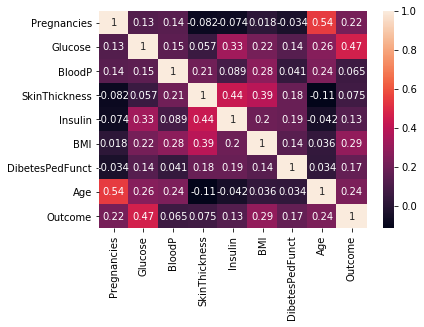

In [22]:
sns.heatmap(corr, annot = True)

In [23]:
# Segun podemos ver la relacion que tiene la variable "Outcome" de salida con respecto a las otras variables, vemos que los
# valores mas correlacionados entre las demas variables y esta, son la "Glucosa" (Glucose), que destaca con diferencia 
# sobre el resto, seguidas en un segundo plano por el "Indice de masa Corporal" (BMI), y la "Edad" (Age), como factores mas
# correlacionados.Y como variables menos correlacionadas o menos significativas de cara a la variable de salida estan
# Grosor del pliegue de la piel(SkinThichness) () y Presion Arterial(BloodP).
# Entre variables las que estan mas correlacionadas entre ellas estan el numero de embarazos(Pregnancies) y la edad (Age).

In [24]:
 # A continuacion vamos a ver o a describir los detalles estadisticos basicos de nuestro dataframe como son
 # el conteo de entradas, la media, desviacion estandard, percentiles y el minimo y el maximo de cada columna del mismo.

In [25]:
diabeticset.describe()

,Pregnancies,Glucose,BloodP,SkinThickness,Insulin,BMI,DibetesPedFunct,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
# Aqui nos damos cuenta que hay valores que son "0" (min) en las columnas "Glucose", "BloodP", "SkinThickness", "Insulin",
# "BMI" y "DiabetesPedFunct" y eso no es posible pues no puede haber una persona por ejemplo con una presion sanguinea de 0
# y resulta del mismo modo para los valores de las otras columnas, se entiende pues el valor 0 como erratico y que sustitu-
# ye como si fuera un valor nulo.

In [27]:
# Vamos a continuacion a ver cuantos valores 0 se encuentran en dichas columnas.

In [28]:
print("BloodP : ", diabeticset[diabeticset.BloodP == 0].shape[0])
print("Glucose : ", diabeticset[diabeticset.Glucose == 0].shape[0])
print("SkinThickness : ", diabeticset[diabeticset.SkinThickness == 0].shape[0])
print("BMI : ", diabeticset[diabeticset.BMI == 0].shape[0])
print("Insulin : ", diabeticset[diabeticset.Insulin == 0].shape[0])

BloodP :  35
Glucose :  5
SkinThickness :  227
BMI :  11
Insulin :  374


In [29]:
# Con lo dicho anteriormente tenemos 2 formas de solucionar este problema, la primera eliminar las filas que contengan 0 
# en cada columna, lo cual es un metodo bastante agresivo, si hay bastantes columnas con 0,como es el caso de "Insulin"
# y "SkinThickness", ello condicionaria bastante los resultados desfavorablemente. O utilizar el metodo de imputacion por 
# ejemplo como vamos a hacer con estas 5 variables. En este caso Imputacion a la media.Este paso de limpieza y 
# transformacion de los datos lo realizaremos en el apartado 7 de nuestro proyecto.

In [30]:
# 6. ANALISIS EXPLORATORIO Y VISUALIZACION.

In [31]:
# 6.1. Histogramas.

In [32]:
# Podemos ver en nuestro histograma de variables que quizás los atributos Age, DiabetespedFunct y Insulin pueden tener una
# distribucion exponencial. También podemos ver que quizás los atributos BMI y BloodP y Glucose pueden tener una  
# distribucion gaussiana o casi gaussiana.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E113B32AC8>,
      dtype=object)

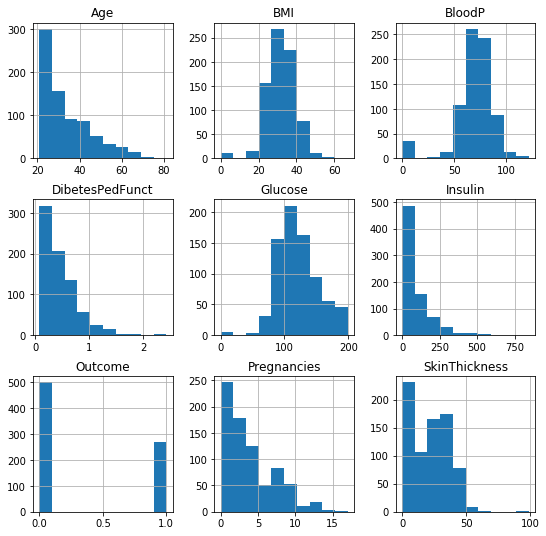

In [33]:
diabeticset.hist(figsize=(9,9))

In [34]:
# 6.2. Graficos de densidad.

In [35]:
# Podemos ver que la distribución de cada atributo es más clara que los histogramas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1141BC7F0>,
      dtype=object)

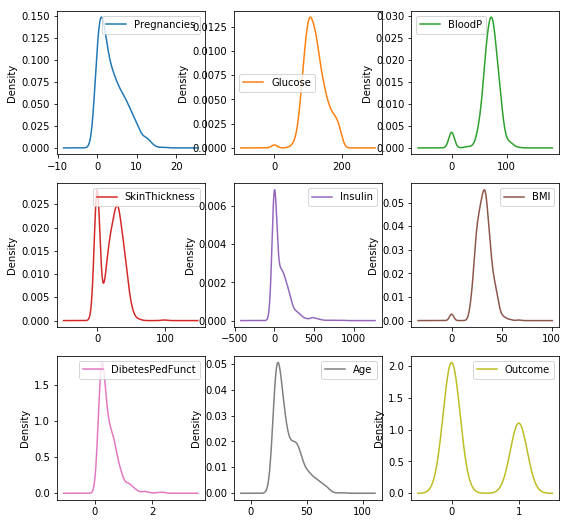

In [36]:
diabeticset.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize = (9,9))

In [37]:
# 6.3. Diagramas de cajas y bigotes.

In [38]:
# Podemos ver que la extensión de los atributos es bastante diferente. A algunos como "Age", "Insulin" y SkinThickness
# parece bastante sesgado hacia valores más pequeños.

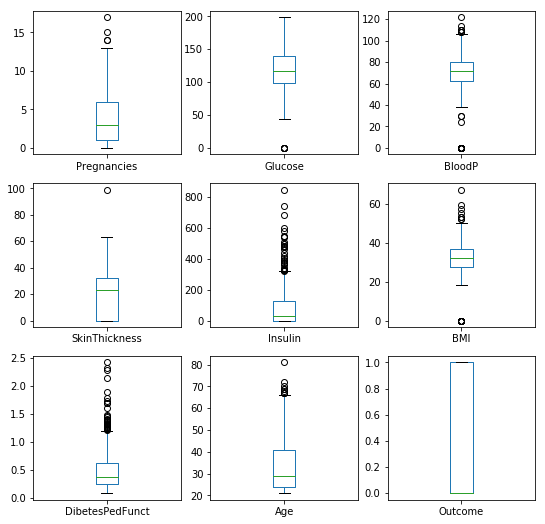

In [39]:
diabeticset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (9,9))
plt.show()

In [40]:
# 7. LIMPIEZA, PREPARACION Y TRANSFORMACION DE DATOS.

In [41]:
# Vamos ahora a sustituir el "0" o nulo en las columnas que hemos determinado anteriormente que no es posible ese valor
# por el valor de la media de cada columna especifica que estamos tratando, esto se conoce como imputacion a la media.

In [42]:
# Asi pues calculamos y sustituimos donde haya "0", segun habiamos especificado en las columnas "BMI", "Glucose", "BloodP" 
# "SkinThickness" y "Insulin".

In [43]:
#Calculamos el valor medio para "BMI" y sustituimos en la columna donde haya el valor "0".

In [44]:
median_BMI = diabeticset["BMI"].median()
diabeticset["BMI"] = diabeticset["BMI"].replace(to_replace=0, value=median_BMI)

In [45]:
# Hacemos lo mismo con "Glucose".

In [46]:
median_Glucose = diabeticset["Glucose"].median()
diabeticset["Glucose"] = diabeticset["Glucose"].replace(to_replace=0, value=median_Glucose)

In [47]:
# Hacemos los mismo con "BloodP".

In [48]:
median_BloodP = diabeticset["BloodP"].median()
diabeticset["BloodP"] = diabeticset["BloodP"].replace(to_replace=0, value=median_BloodP)

In [49]:
# Hacemos lo mismo con "SkinThickness".

In [50]:
median_SkinThickness = diabeticset["SkinThickness"].median()
diabeticset["SkinThickness"] = diabeticset["SkinThickness"].replace(to_replace=0, value=median_SkinThickness)

In [51]:
# y por ultimo hacemos lo mismo con "Insulin".

In [52]:
median_Insulin = diabeticset["Insulin"].median()
diabeticset["Insulin"] = diabeticset["Insulin"].replace(to_replace=0, value=median_Insulin)

In [53]:
# Comprobamos en los archivos de cabecera como ya estan corregidos algunos ceros por su media.

In [54]:
diabeticset.head()

,Pregnancies,Glucose,BloodP,SkinThickness,Insulin,BMI,DibetesPedFunct,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [55]:
# Como vemos hay diferencia entre las columnas debido a diferentes escalas (escalas variables) y en los rangos entre los
# datos como por ejemplo "Pregnancies"(0-17) y "Age"(20-80). Asi que vamos a preparar estos datos transformandolos
# reescalando los atributos para que todos tengan la misma escala. Estos atributos a menudo se reescalan en el rango entre
# 0 y 1. Para realizar esto utilizamos a traves de scikit-learn la funcion MinMaxScaler.

In [56]:
# Asi pues lo primero que vamos a hacer es dividir el dataset en input (entrada) y output (salida) variables para Machine
# Learning, y luego aplicar la transformacion (reescalar) a las input variables.

In [57]:
# Dividimos el dataset como hemos indicado.

In [58]:
array = diabeticset.values
X = array[:,0:8]
Y = array[:,8]

In [59]:
# Procedemos a reescalar los valores de nuestro dataset (input variables--X). 

In [60]:
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(X)
print (rescaledX)

[[0.35294118 0.67096774 0.48979592 ... 0.31492843 0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 ... 0.17177914 0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 ... 0.10429448 0.25362938 0.18333333]
 ...
 [0.29411765 0.49677419 0.48979592 ... 0.16359918 0.07130658 0.15      ]
 [0.05882353 0.52903226 0.36734694 ... 0.24335378 0.11571307 0.43333333]
 [0.05882353 0.31612903 0.46938776 ... 0.24948875 0.10119556 0.03333333]]


In [61]:
# Como vemos una vez rescalado, los valores del rango en las columnas estan todos entre 0 y 1.

In [62]:
# Ahora vamos a proceder a tranformarlo en un dataframe que luego podamos utilizar una vez reescalado los datos para 
# aplicar nuestro modelo machine learning.

In [63]:
df = pd.DataFrame(data=rescaledX)
df.head()

,0,1,2,3,4,5,6,7
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [64]:
# Vamos a crear un dataframe que contenga el nombre de cada columna para que nos quede asignado a cada nombre correctamente.

In [65]:
df_escalado = df.rename(columns = {0: "Pregnancies", 1: "Glucose", 2: "BloodP", 3: "SkinThickness", 4: "Insulin", 5: "BMI",
                     6: "DiabetesPedFunct", 7:"Age"})
df_esc = pd.DataFrame (df_escalado)
df_esc.head()

,Pregnancies,Glucose,BloodP,SkinThickness,Insulin,BMI,DiabetesPedFunct,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [66]:
# 8. SELECCION DE LA IMPORTANCIA DE LA CARACTERISTICA. 

In [67]:
# Ahora seleccionamos las caracteristicas que contribuyan mas a la variable de salida en la que se esta interesado y en
# la que obtendremos una puntuacion de la importancia de cada atributo, asi pues a mayor puntuacion mayor importancia y
# seleccionaremos algunas de las que puntuan mas.

In [68]:
# Haremos este proceso con las variables de X ya rescaladas.

In [69]:
array = diabeticset.values
X = rescaledX
Y = array[:,8]
model = ExtraTreesClassifier(n_estimators = 100, random_state = 7)
model.fit(X, Y)
print(model.feature_importances_)

[0.1053355  0.24571141 0.09569972 0.08304263 0.07796748 0.14234739
 0.11577191 0.13412395]


In [70]:
# Las puntaciones dadas mas altas nos dan entre los primeros 3 puestos de las caracteristicas pricipales a "Glucose" 
# "BMI", y "Age". 

In [71]:
# A partir de aqui vamos a analizar las diferencias o relaciones que se pueden establecer entre estas caracteristicas
# que hemos seleccionado como mas importantes del modelo como son la "Glucose", "BMI" y "Age" . Ello lo haremos a traves
# del modelo no supervisado K-means. 

In [72]:
# 9.MODELO NO SUPERVISADO K-MEANS (CONTINUACION ANALISIS EXPLORATORIO).

In [73]:
# Concretamos pues la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve solo cargamos las
# columnas "Glucose", "BMI", y "Age" de nuestra variable X. Y utilizamos nuestro dataframe diabeticset sin normalizar para
# aplicar nuestro metodo. A posteriori analizamos la dimension del conjunto que nos queda.

In [74]:
X = np.array(diabeticset[["Glucose", "BMI", "Age"]])
Y = np.array(diabeticset["Outcome"])
X.shape

(768, 3)

In [75]:
# Ahora vamos a pasar a obtener el valor K, haciendo una grafica para obtener el "punto de codo", que representa una forma
# bastante buena para obtener un valor optimo del valor K, que definiria el numero de clusters con el que vamos a eje-
# cutar y representar nuestro algoritmo.

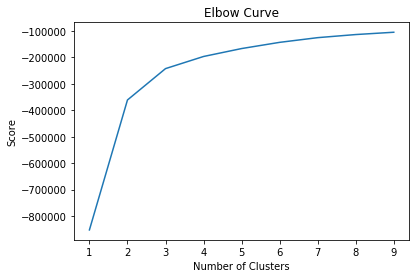

In [76]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

In [58]:
# La curva elbow nos muestra que un valor de K = 3 puede ser apropiado, ya que a partir de ahi la curva empieza a 
# estabilizarse, aunque no hay una solución, un valor de k, más correcto que otro, en funcion del K escogido mejoraremos
# nuestra solucion.

In [59]:
# Una vez estimado K, ejecutamos el algoritmo para 3 clusters y obtenemos las etiquetas y los centroides.

In [60]:
# con init='k-means++', seleccionamos los valores iniciales (centros) como semillas  en el algoritmo k-means, con este 
# metodo se produce una mejora considerable en el error final de kmeans. Aunque la seleccion inicial en el algoritmo toma
# tiempo extra, k-means converge muy rapidamente despues de la seleccion de puntos iniciales y por lo tanto este algoritmo
# reduce el tiempo de calculo y con random_state=numero, lo hacemos reproducible para que de el mismo resultado y asi
# pueda ser otra vez reproducible.

In [77]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=5).fit(X)
centroids =kmeans.cluster_centers_
print(centroids)

[[170.24324324  35.14594595  38.61486486]
 [127.16835017  33.08417508  34.38720539]
 [ 94.3250774   30.63374613  29.7244582 ]]


In [78]:
# Ahora con los datos vamos a realizar la grafica 3D con cada uno de los clusters designados por un color asignado 
# determinado.

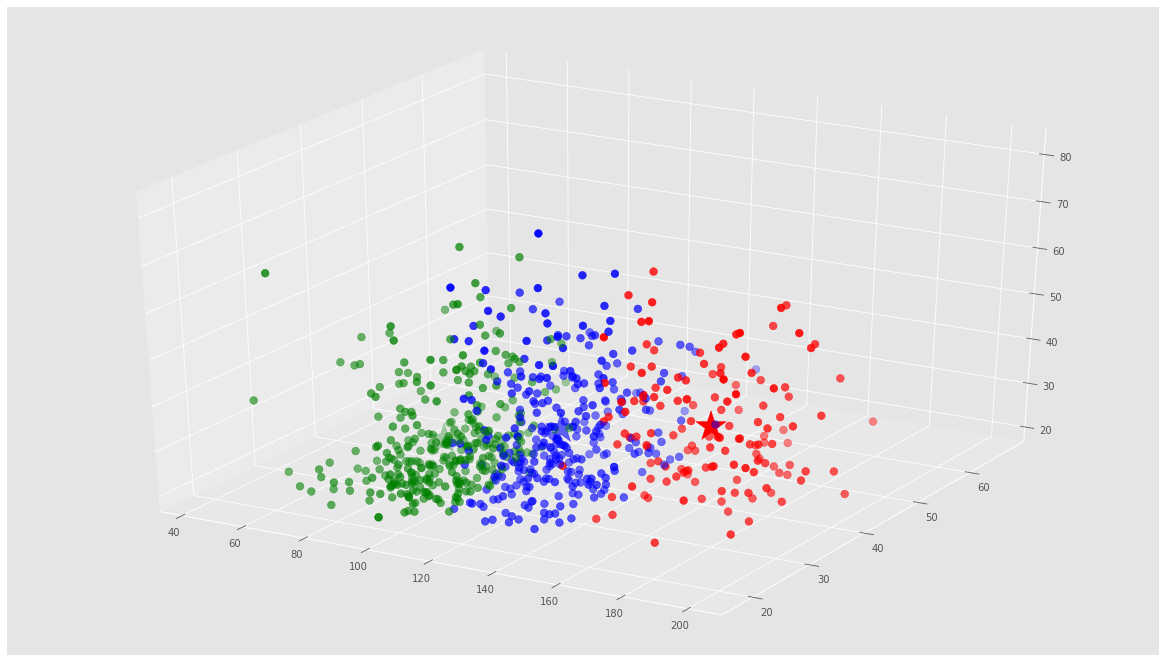

In [79]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# Prediciendo los clusters
labels = kmeans.predict(X)
# Obteniendo los centros de los clusters
C = kmeans.cluster_centers_
colores=['red','blue','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [80]:
# Vemos que se han agrupado con K=3 clusters las caracteristicas mas importantes del modelo que hemos definido
# "Glucose", "BMI" y "Age".

In [81]:
# A continuacion haremos 3 graficas en 2 dimensiones con las proyecciones a partir de nuestra grafica 3D para que nos
# ayude a visualizar los grupos y su clasificacion.

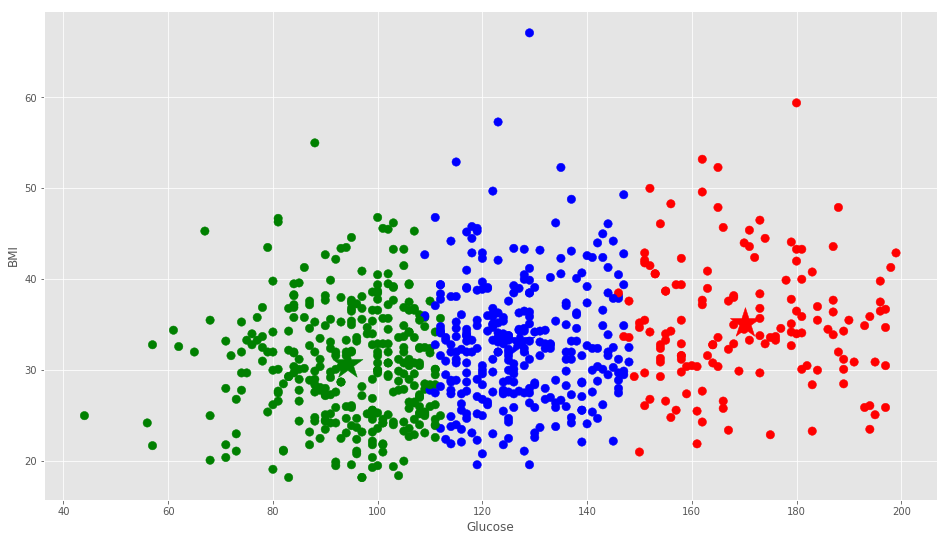

In [82]:
f1 = diabeticset["Glucose"].values
f2 = diabeticset["BMI"].values
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

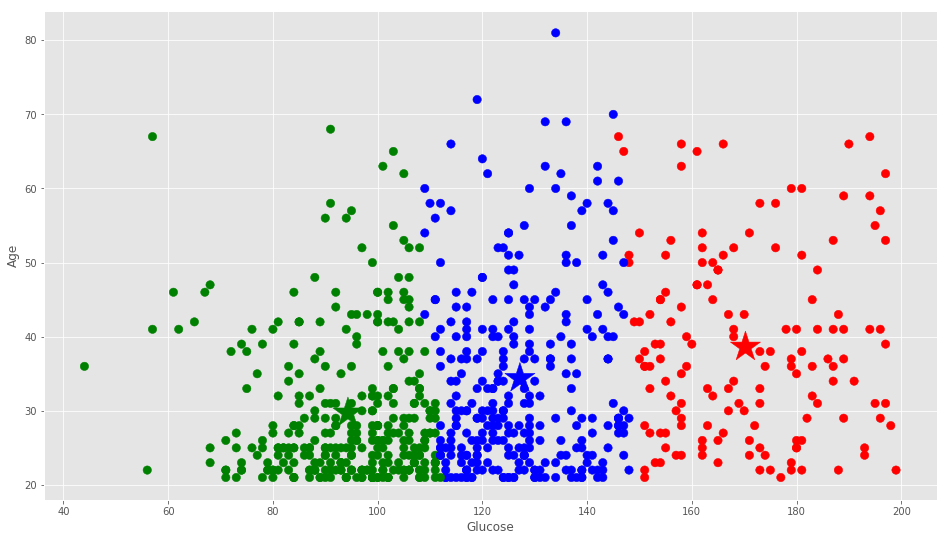

In [83]:
f1 = diabeticset["Glucose"].values
f2 = diabeticset["Age"].values
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

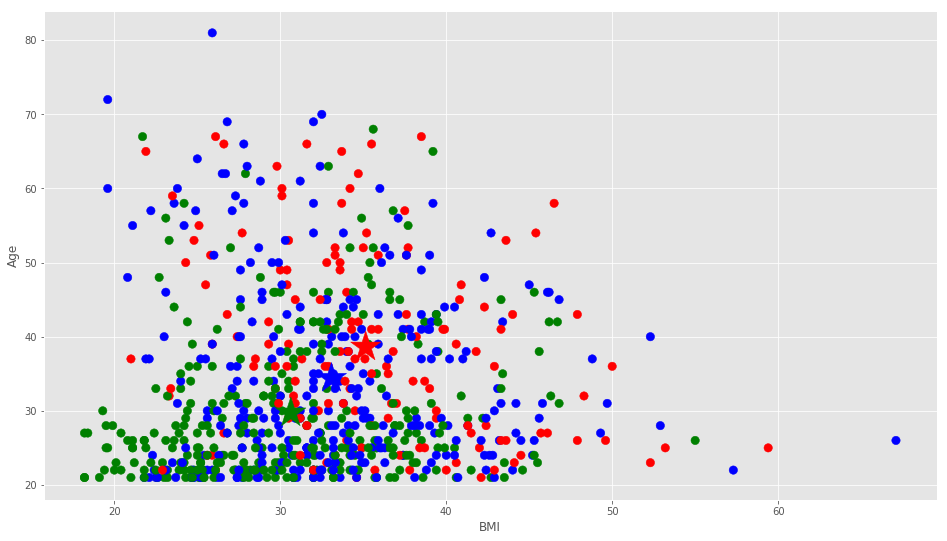

In [84]:
f1 = diabeticset["BMI"].values
f2 = diabeticset["Age"].values
plt.xlabel('BMI')
plt.ylabel('Age')
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [110]:
# Ahora vamos a analizar en 2D confrontando las caracteristicas a estudio y vemos en la sucesion de imagenes 2D que en la

# figura 1:(BMI-Glucose)
#                       * Los clusters rojo, verde y azul representan en general con respecto a "BMI" valores 
#                         medios-bajos, sin embargo en los valores respecto a la "Glucose", el cluster azul representa
#                         valores medios, mientras el cluster rojo representa valores mas bien altos y el cluster verde 
#                         valores medios mas bien tirando a bajos.
#                       
# figura 2:(Age-Glucose)
#                       * Los clusters azul y verde representan valores en "Age" con concentracion de valores bajos pero 
#                         hay valores muy dispersos que llegan a las zonas medias-altas, asimismo los valores del cluster
#                         rojo con respecto al mismo se encuentran dispersos a lo largo de la zona media-baja.
#                         Con respecto a la "Glucosa", los valores del cluster verde son medio-bajos, los del cluster azul
#                         son valores medios y los del cluster rojo mas bien valores altos.
#                         
#                        
# figura 3:(Age-BMI)                      
#                       * Con respecto a "Age" los clusters azul, rojo y verde se concentran en la zona baja con dispersion
#                         a la zona media-alta. En cuanto a "BMI" los clusters azul, rojo y verde tambien representan  
#                         valores medios-bajos.
#                         Se hace notar que los centroidoes y por tanto la concentracion de los valores de los 3 clusteres,
#                         se encuentran bastantes juntos y se entremezclan por tanto en la figura.
#
#                       * Se destaca la presencia de outliers en los 3 clusters de las figuras analizadas.

In [111]:
# 10. EVALUACION ALGORITMOS. COMPARACION ENTRE MODELOS SUPERVISADOS AFINES AL CASO.

In [112]:
# Una vez reescalados los datos de entrada, para aplicar machine learning, ahora vamos a dividir los datos en entrenami- 
# ento y prueba, y vamos a utilizar un 67% de datos para modelar y retener un 33% para validar. 

In [113]:
array = diabeticset.values
X = rescaledX
Y = array[:,8]
seed = 7
validation_size = 0.33
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [114]:
# A continuacion determinaremos la metrica y el numero de veces que vamos a utilizar la validacion cruzada. En este caso
# sera num_fold = 10 (10 veces), y como metrica (puntuacion) sera "acuracy" que es una buena metrica en problemas de cla-
# sificacion.

In [115]:
num_folds = 10 
seed = 7 
scoring = 'accuracy'

In [116]:
# Ahora vamos a  hacer comprobaciones con una suite de diferentes algoritmos que sean capaces de trabajar en este problema
# de clasificacion, para ver cual resulta de ellos la mejor solucion. los 6 algoritmos son:
#                             -Regresion Logistica (LR)
#                             -Analisis Discriminante Lineal (LDA)
#                             -K-Vecinos mas Cercanos (KNN)
#                             -Arboles de Clasificacion (CART)
#                             -Gaussian Naive Bayes (NB)
#                             -Maquinas de Vectores de Soporte (SVM)
# Los dos primeros LR y LDA se corresponden con Algoritmos Lineales. Los demas se corresponden con Algoritmos No Lineales.

In [117]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

In [118]:
# Para que el resultado sea una estimacion mas confiable del rendimiento del algoritmo en los nuevos datos, utilizamos 
# La validacion cruzada K-Fold (K-Fold Cross Validation) para cada algoritmo, que es mas preciso porque el algoritmo se 
# entrena y evalua varias veces en diferentes datos.Para los modestos conjuntos de datos de tamaño en los miles o decenas 
# de miles de registros, los valores k de 3, 5 y 10 son común. En el siguiente ejemplo usamos validación cruzada 10 veces
# como indicamos anteriormente.

In [119]:
# Asi pues compararemos los algoritmos y lo haremos mostrando la media y la desviacion estandar de precision (accuracy)
# para cada algoritmo a medida que lo calculamos y recopilar los resultados para su uso posterior.

In [120]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg ="%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.772210 (0.079772)
LDA: 0.774246 (0.068771)
KNN: 0.729449 (0.073662)
CART: 0.710106 (0.055444)
NB: 0.741290 (0.059193)
SVM: 0.764329 (0.074648)


In [121]:
# Podemos ver que los modelos que nos han salido con mayor puntuacion son LR y LDA. vamos a ajustar estos 2 modelos a ver
# cual nos sale mas favorable para nuestra solucion. Para ello vamos a emplear RandomizedSearchCV y GridSearchCV para 
# ambas soluciones.

In [122]:
# Ahora veremos una grafica con el diagrama de caja y bigotes para ver un comparativa del resultado de los modelos
# probados.

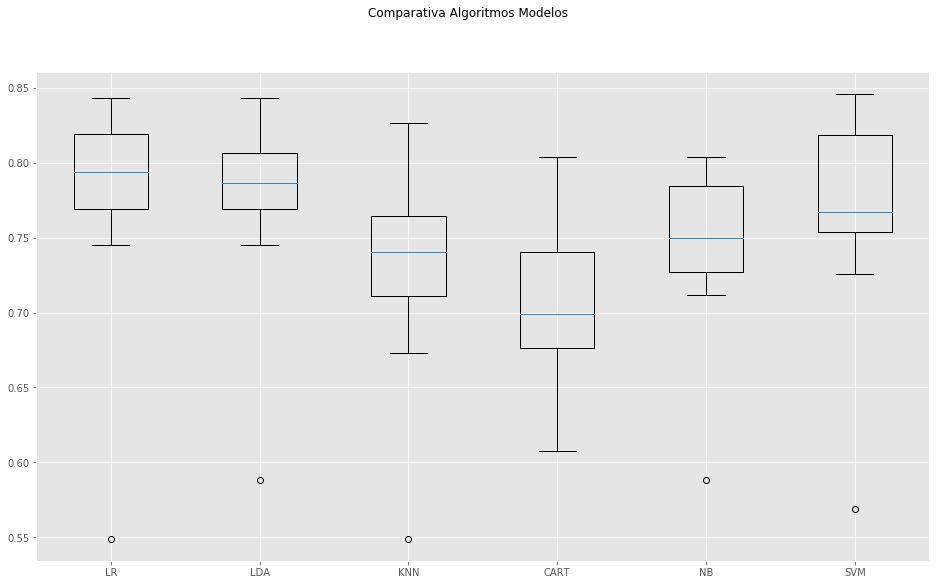

In [123]:
fig = plt.figure()
fig.suptitle('Comparativa Algoritmos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [124]:
# Asi pues vamos a aplicar RandomizedSearchCV y GridSearchCV para LR y LDA.

In [125]:
param_grid = {'C' : uniform(1, 50)}
model = LogisticRegression(solver='lbfgs')
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold,  random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.C)

0.7760416666666666
39.99593961200573


In [126]:
param_grid = {'n_components' : uniform(1, 50)}
model = LinearDiscriminantAnalysis()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold,  random_state=7)
rsearch.fit(X, Y)
print(rsearch.best_score_)
print(rsearch.best_estimator_.n_components)

0.7721354166666666
4.815414468697859


In [127]:
param_grid = {'C': [1,3,5,7,9,11,13,17,19,21,50,100,400]}
model = LogisticRegression(solver='lbfgs')
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.778210 using {'C': 11}
0.772374 (0.079513) with {'C': 1}
0.772374 (0.073541) with {'C': 3}
0.772374 (0.073541) with {'C': 5}
0.776265 (0.075091) with {'C': 7}
0.776265 (0.075091) with {'C': 9}
0.778210 (0.069750) with {'C': 11}
0.776265 (0.069278) with {'C': 13}
0.776265 (0.069278) with {'C': 17}
0.776265 (0.069278) with {'C': 19}
0.774319 (0.068087) with {'C': 21}
0.774319 (0.068087) with {'C': 50}
0.774319 (0.068087) with {'C': 100}
0.774319 (0.068087) with {'C': 400}


In [128]:
param_grid = {'n_components': [1,3,5,7,9,11,13,17,19,21,50,100,400]}
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with %r" % (mean, stdev, param))

Best: 0.774319 using {'n_components': 1}
0.774319 (0.068522) with {'n_components': 1}
0.774319 (0.068522) with {'n_components': 3}
0.774319 (0.068522) with {'n_components': 5}
0.774319 (0.068522) with {'n_components': 7}
0.774319 (0.068522) with {'n_components': 9}
0.774319 (0.068522) with {'n_components': 11}
0.774319 (0.068522) with {'n_components': 13}
0.774319 (0.068522) with {'n_components': 17}
0.774319 (0.068522) with {'n_components': 19}
0.774319 (0.068522) with {'n_components': 21}
0.774319 (0.068522) with {'n_components': 50}
0.774319 (0.068522) with {'n_components': 100}
0.774319 (0.068522) with {'n_components': 400}


In [129]:
# Viendo los datos al intentar optimizar los 2 algoritmos que mas puntuaciones nos dan, vemos que el algoritmo de
# regresion logistica nos da un resultado mayor en comparacion, obteniendo una mayor puntacion del 77.82% para un valor 
# C=11. Por tanto elegimos este modelo.

In [130]:
# Ahora con estos datos obtenidos vamos a intentar finalizar el modelo, determinando la matriz de confusion y la posterior 
# curva ROC y AUC para el modelo.

In [131]:
LR = LogisticRegression(C=11,solver='lbfgs')
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)
print (accuracy_score(Y_validation, predictions))
print (confusion_matrix(Y_validation, predictions))
print (classification_report(Y_validation, predictions))

0.7637795275590551
[[139  23]
 [ 37  55]]
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       162
         1.0       0.71      0.60      0.65        92

   micro avg       0.76      0.76      0.76       254
   macro avg       0.75      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



In [132]:
# Entonces entendiendo en la matriz que el resultado negativo se considera "0" No diabetico y positivo "1" Diabetico
# vemos en el modelo que ha predicho TP y TN correctamente, TP=139 como verdaderos negativos (no tienen diabetes) y TN= 55
# verdaderos positivos (si tienen diabetes), y sin embargo hay FN=37 como falso negativo (el modelo predijo la clase 
# positiva incorrectamente, como la clase negativa), y FP=23 como falso positivo (el modelo predijo incorrectamente la
# clase negativa, para ser una clase positiva). Dando como resultado en puntuacion un 76.3 % de precision (accuracy) en el 
# conjunto de prueba utilizando el modelo de regresion logistica.

In [133]:
# 11. CURVA ROC Y AUC.

In [134]:
# Ahora con los datos que tenemos realizaremos la curva ROC y AUC. 

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.961


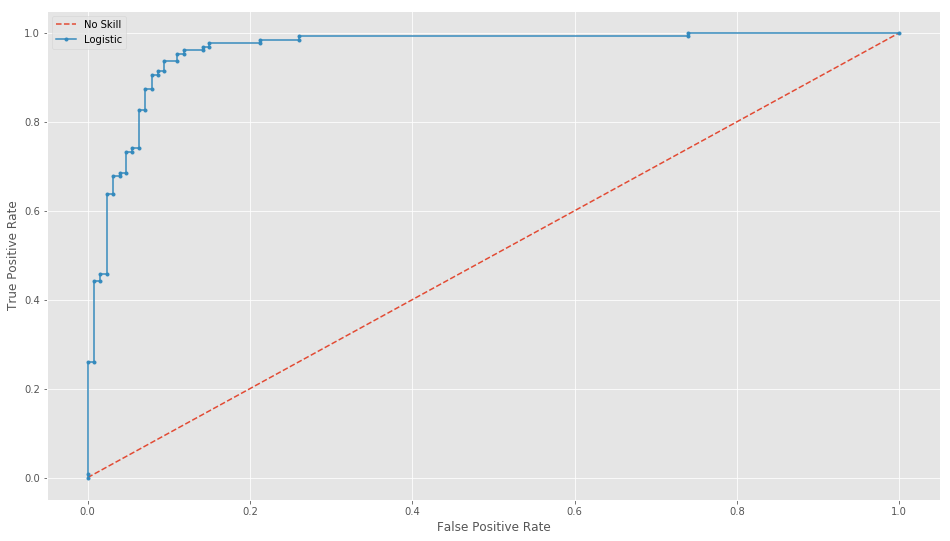

In [135]:
# generar conjunto de datos de 2 clases.
X, Y = make_classification (n_samples = 768, n_classes = 2, random_state = 1)
# dividir el conjunto de datos en entrenamiento y prueba.
X_train, X_validation, Y_train, Y_validation = train_test_split ( X, Y, test_size = 0.33, random_state = 2 )
# generar una predicción sin habilidad ( clase mayoritaria ).
ns_probs = [ 0  for _ in range (len(Y_validation))]
# se ajusta a un modelo en este caso el escogido como mejor solucion.
model = LogisticRegression(C=11, solver = 'lbfgs')
model.fit(X_train, Y_train)
# predecir probabilidades
lr_probs = model.predict_proba(X_validation)
# mantener probabilidades para el resultado positivo solamente
lr_probs = lr_probs [:, 1]
# calcular puntuajes
ns_auc = roc_auc_score(Y_validation, ns_probs)
lr_auc = roc_auc_score(Y_validation, lr_probs)
# resumir puntuajes
print ('No Skill: ROC AUC=%.3f' % (ns_auc)) 
print ('Logistic: ROC AUC=%.3f' % (lr_auc))
# calcular curvas roc
ns_fpr, ns_tpr, _ = roc_curve(Y_validation, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_validation, lr_probs) 
# trazar la curva de roc para el modelo
plt.plot (ns_fpr, ns_tpr, linestyle ='--', label = 'No Skill')
plt.plot (lr_fpr, lr_tpr, marker = '.', label = 'Logistic')
# etiquetas de eje
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# muestra la leyenda
plt.legend()
# muestra la trama
plt.show()

In [136]:
# ANEXO. CARGA DEL MODELO Y RECUPERACION DEL MISMO.

In [137]:
# Vamos ahora a tratar de guardar en un archivo el algoritmo que hemos elegido para poder a posteriori recuperarlo, y
# asi poder exponer nuevos datos para predecir el objetivo propuesto que no es mas que detectar si los nuevos miembros
# son diabeticos o no en base a estos nuevos datos a analizar.

In [138]:
# Asi pues para ello vamos a usar la operacion "pickle" para serializar nuestro algoritmo de machine learning y salvar 
# el formato serializado a archivo. Despues a posteriori podremos cargar este archivo para deserializar nuestro modelo
# y usarlo para nuevas predicciones. Asi pues procedemos:

In [139]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pickle import dump
from pickle import load
file = 'd:/Users/USUARIO/Desktop/diabetes.csv'
diabeticset = read_csv(file)
diabeticset.columns = ['Pregnancies', 'Glucose', 'BloodP', 'SkinThickness', 'Insulin', 'BMI', 'DibetesPedFunct', 'Age',
                       'Outcome']
array=diabeticset.values
X=rescaledX
Y=array[:,8]
# Entrenamos el modelo al 33% como hemos dicho:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.33, random_state=7)
model = LogisticRegression(C=11, solver = 'lbfgs')
model.fit(X_train, Y_train)
# Ahora procedemos a salvar el modelo al disco:
file = 'final_model.sav'
dump(model, open(file, 'wb'))

In [140]:
# Para cargar el modelo a disco haremos:
loaded_model = load(open(file, 'rb'))
result = loaded_model.score(X_validation, Y_validation)
print(result)
# Cargar el modelo y evaluarlo proporciona una estimacion de la precision del modelo en datos no vistos.

0.7637795275590551


In [141]:
# Por ultimo probaremos a hacer una prediccion con el modelo con datos inventados:

In [142]:
prueba_df = pd.DataFrame([[6, 168, 72, 35, 0, 43.6, 2, 65]])
prueba_df.columns = ['Dato1', 'Dato2', 'Dato3', 'Dato4', 'Dato5', 'Dato6', 'Dato7', 'Dato8']
print(prueba_df)

   Dato1  Dato2  Dato3  Dato4  Dato5  Dato6  Dato7  Dato8
0      6    168     72     35      0   43.6      2     65


In [143]:
scaledX = scaler.transform(prueba_df)
print (scaledX)

[[ 0.35294118  0.8         0.48979592  0.30434783 -0.01682692  0.5194274
   0.8206661   0.73333333]]


In [144]:
predictions = LR.predict(scaledX)
print (predictions)

[1.]


In [146]:
# Nos sale la prediccion para la fila de datos nueva que hemos introducido el valor de "1" (Diabetico).